# Case Study of equipment’s signal quality

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks')

PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset

In [ ]:
#checking tensorflow version
import tensorflow as tf
tf.__version__

'2.4.1'

1. Import data. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.optimizers import SGD
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
import h5py
from tensorflow.keras.layers import Activation, Dense, Reshape, BatchNormalization, Dropout

Load the data

In [ ]:
#Open the file as readonly
data =h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5",'r')

In [ ]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [ ]:
#Storing the training, testing, and validation data to variables

X_train=data['X_train']
X_test=data['X_test']
X_val=data['X_val']
y_train=data['y_train']
y_test=data['y_test']
y_val=data['y_val']

Data pre-processing

In [ ]:
# Printing data type of training, testing, and validation data
print("X train  Data Type : ", X_train.dtype)
print("X test  Data Type : ", X_test.dtype)
print("X val  Data Type : ", X_val.dtype)
print("y train Data Type : ", y_train.dtype)
print("y test Data Type : ", y_test.dtype)
print("y val Data Type : ", y_val.dtype)

X train  Data Type :  float32
X test  Data Type :  float32
X val  Data Type :  float32
y train Data Type :  uint8
y test Data Type :  uint8
y val Data Type :  uint8


In [ ]:
# Printing the shape of training, testing, and validation data
print("X train Shape :", X_train.shape)
print("X test Shape :", X_test.shape)
print("X val Shape :", X_val.shape)
print("y train Shape :", y_train.shape)
print("y test Shape :", y_test.shape)
print("y val Shape :", y_val.shape)

X train Shape : (42000, 32, 32)
X test Shape : (18000, 32, 32)
X val Shape : (60000, 32, 32)
y train Shape : (42000,)
y test Shape : (18000,)
y val Shape : (60000,)


visualisation.

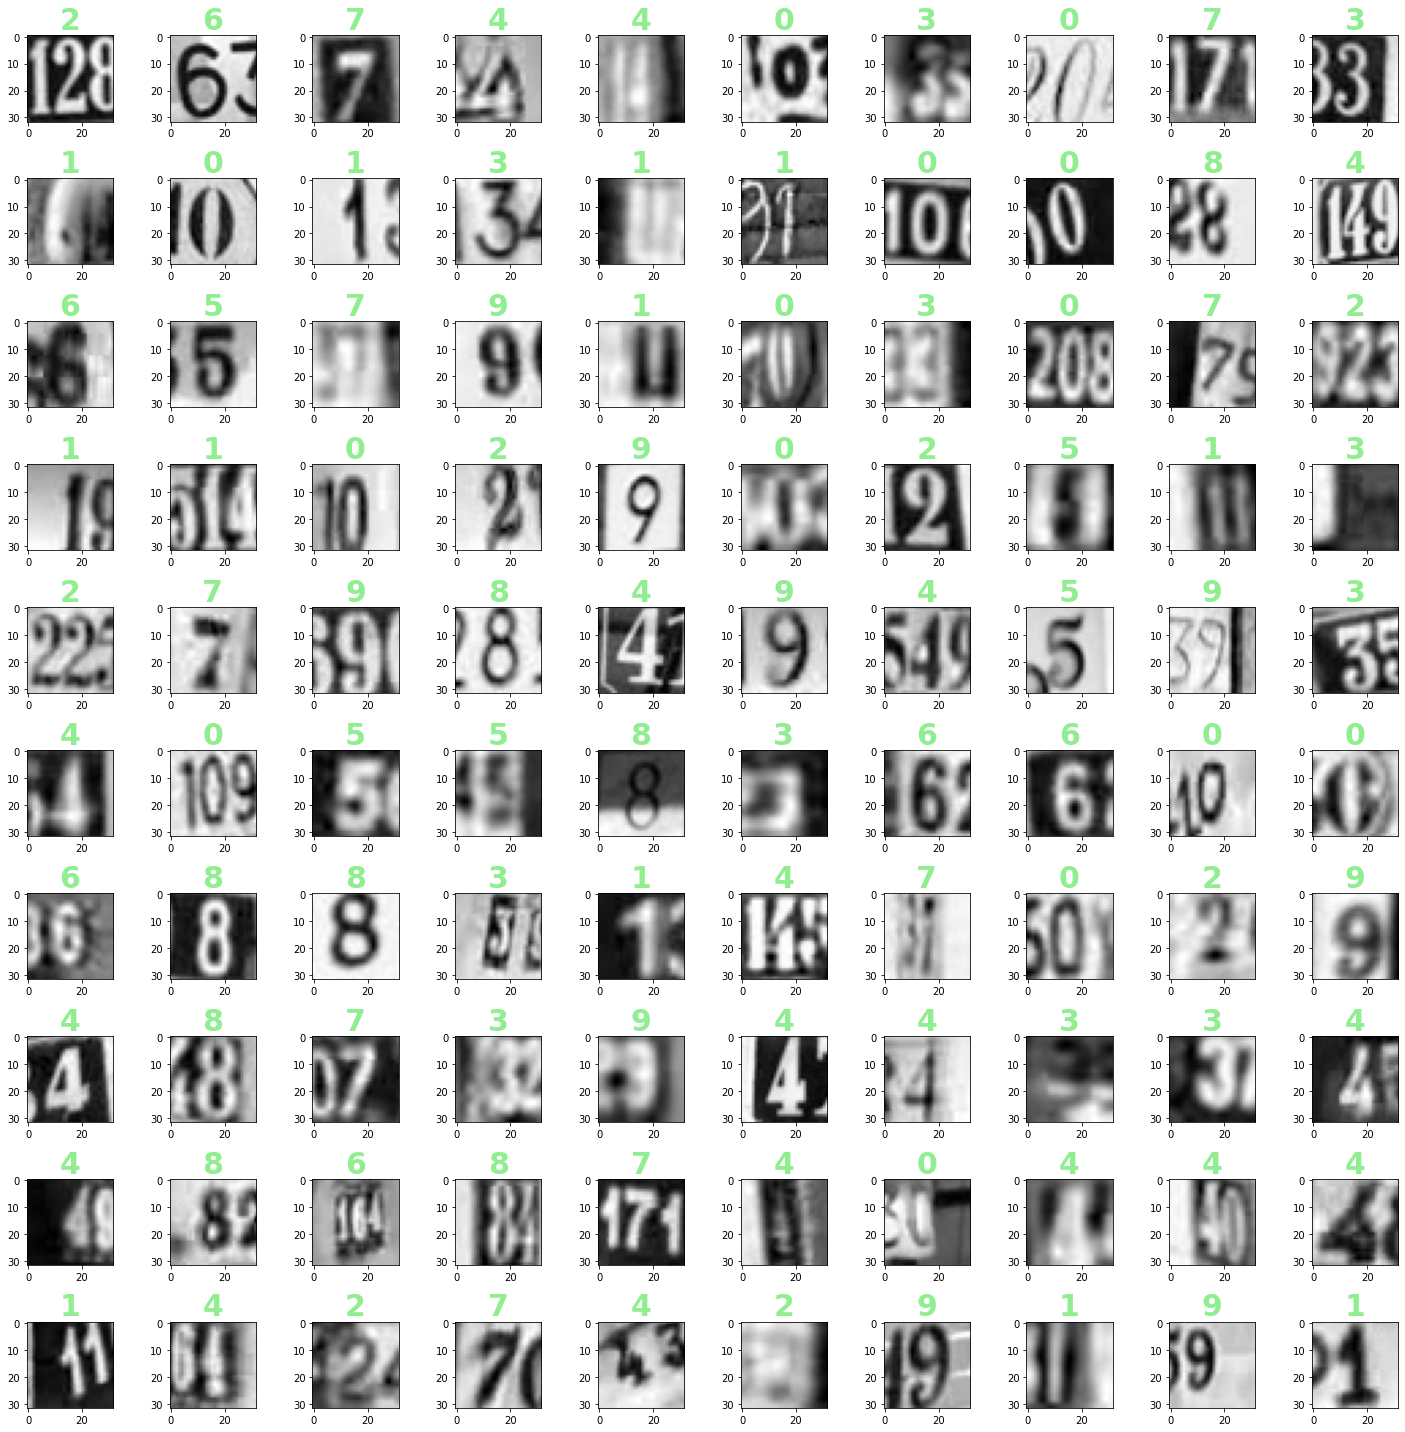

In [ ]:
def plot_images(images, labels, num_row=4, num_col=6):
   
    fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
    for i in range(0,num_row * num_col):
        ax = axes[i//num_col, i%num_col]       
        ax.imshow(images[i], cmap="gray")
        ax.set_title(labels[i],weight='bold',fontsize=30, color='lightgreen')
    plt.tight_layout()    
    plt.show()


plot_images(X_train, y_train, num_row=10, num_col=10)

Design, train, tune and test a neural network image classifier.

In [ ]:
#Reshape the  2D data  -> 32*32 to  1D -> 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [ ]:
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Max value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Max value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


Normalize the values

In [ ]:
maxVal=X_train.max()
X_train_std = X_train/maxVal
X_val_std = X_val/maxVal
X_test_std = X_test/maxVal

In [ ]:
print('After Normalization')
print(f'Min value is {X_train_std.min()}')
print(f'Max value is {X_train_std.max()}')

After Normalization
Min value is 0.0
Max value is 1.0


One hot encode the labels for train and test data

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tf.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
print(f'Example: value after one hot encode {y_train[0]}')

Example: value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Implementing Neural Network

In [ ]:
# Initialize Sequential model
model = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
model.add(Dense(512,input_shape = (1024, ),activation='relu'))

#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256,activation='relu'))


#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128,activation='relu'))


#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64,activation='relu'))


#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32,activation='relu'))


# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation (Activation)      (None, 10)                0

In [ ]:
# compiling using  sgd optimizer 
# and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the model to the Training data
history_0_sgd = model.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 5s 19ms/step - loss: 2.3021 - accuracy: 0.1107 - val_loss: 2.2926 - val_accuracy: 0.1279
Epoch 2/10
210/210 [==============================] - 3s 16ms/step - loss: 2.2888 - accuracy: 0.1504 - val_loss: 2.2792 - val_accuracy: 0.1895
Epoch 3/10
210/210 [==============================] - 3s 16ms/step - loss: 2.2758 - accuracy: 0.1900 - val_loss: 2.2632 - val_accuracy: 0.1947
Epoch 4/10
210/210 [==============================] - 3s 16ms/step - loss: 2.2569 - accuracy: 0.2154 - val_loss: 2.2363 - val_accuracy: 0.2280
Epoch 5/10
210/210 [==============================] - 3s 16ms/step - loss: 2.2276 - accuracy: 0.2453 - val_loss: 2.1935 - val_accuracy: 0.2398
Epoch 6/10
210/210 [==============================] - 3s 16ms/step - loss: 2.1794 - accuracy: 0.2661 - val_loss: 2.1258 - val_accuracy: 0.2858
Epoch 7/10
210/210 [==============================] - 3s 16ms/step - loss: 2.1115 - accuracy: 0.2810 - val_loss: 2.0783 - val_accuracy: 0.2855

In [ ]:
#Evaluate the model with sgd optimizer 
score = model.evaluate(X_test_std, y_test)
print('model with sgd optimizer ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.8062 - accuracy: 0.3706
model with sgd optimizer 
Test loss: 1.806219458580017
Test accuracy: 0.3705555498600006


In [ ]:
#Using adam optimizer 
# and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training data
history_0_adam = model.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 4s 17ms/step - loss: 2.1635 - accuracy: 0.2306 - val_loss: 1.5881 - val_accuracy: 0.4489
Epoch 2/10
210/210 [==============================] - 3s 16ms/step - loss: 1.4991 - accuracy: 0.4886 - val_loss: 1.3140 - val_accuracy: 0.5630
Epoch 3/10
210/210 [==============================] - 3s 16ms/step - loss: 1.2980 - accuracy: 0.5749 - val_loss: 1.2108 - val_accuracy: 0.6119
Epoch 4/10
210/210 [==============================] - 3s 16ms/step - loss: 1.1517 - accuracy: 0.6361 - val_loss: 1.1127 - val_accuracy: 0.6447
Epoch 5/10
210/210 [==============================] - 3s 16ms/step - loss: 1.0467 - accuracy: 0.6716 - val_loss: 1.0058 - val_accuracy: 0.6813
Epoch 6/10
210/210 [==============================] - 4s 17ms/step - loss: 0.9742 - accuracy: 0.6966 - val_loss: 0.8711 - val_accuracy: 0.7319
Epoch 7/10
210/210 [==============================] - 4s 17ms/step - loss: 0.8847 - accuracy: 0.7252 - val_loss: 0.8461 - val_accuracy: 0.7383

In [ ]:
#Evaluate the model with Adam optimizer 
score = model.evaluate(X_test_std, y_test)
print('model with Adam optimizer ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.8436 - accuracy: 0.7387
model with Adam optimizer 
Test loss: 0.8436294198036194
Test accuracy: 0.7386666536331177


In [ ]:
#Using  the learning rate  and decay in sgd
optimizer = SGD(lr=0.0001)
# compiling the model 
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the model to the Training data
history_1_sgd = model.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7506 - accuracy: 0.7646 - val_loss: 0.7254 - val_accuracy: 0.7789
Epoch 2/100
210/210 [==============================] - 3s 16ms/step - loss: 0.7026 - accuracy: 0.7842 - val_loss: 0.7082 - val_accuracy: 0.7861
Epoch 3/100
210/210 [==============================] - 3s 16ms/step - loss: 0.6893 - accuracy: 0.7919 - val_loss: 0.7009 - val_accuracy: 0.7880
Epoch 4/100
210/210 [==============================] - 3s 16ms/step - loss: 0.6932 - accuracy: 0.7888 - val_loss: 0.6966 - val_accuracy: 0.7894
Epoch 5/100
210/210 [==============================] - 3s 15ms/step - loss: 0.6758 - accuracy: 0.7938 - val_loss: 0.6935 - val_accuracy: 0.7902
Epoch 6/100
210/210 [==============================] - 3s 15ms/step - loss: 0.6776 - accuracy: 0.7942 - val_loss: 0.6911 - val_accuracy: 0.7908
Epoch 7/100
210/210 [==============================] - 3s 16ms/step - loss: 0.6741 - accuracy: 0.7953 - val_loss: 0.6890 - val_accuracy:

In [ ]:
#Evaluate the model with SGD optimizer with LR 
score = model.evaluate(X_test_std, y_test)
print('model with SGD optimizer  with LR')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.7142 - accuracy: 0.7884
model with SGD optimizer  with LR
Test loss: 0.7142089009284973
Test accuracy: 0.7883889079093933


In [ ]:
#Using adam optimizer 
# and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
adam = tf.keras.optimizers.Adam(lr = 0.0001)
# compiling the model
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the model 
history_1_adam = model.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6533 - accuracy: 0.7973 - val_loss: 0.6503 - val_accuracy: 0.8010
Epoch 2/100
210/210 [==============================] - 3s 16ms/step - loss: 0.6223 - accuracy: 0.8079 - val_loss: 0.6417 - val_accuracy: 0.8041
Epoch 3/100
210/210 [==============================] - 3s 16ms/step - loss: 0.6167 - accuracy: 0.8103 - val_loss: 0.6333 - val_accuracy: 0.8074
Epoch 4/100
210/210 [==============================] - 3s 16ms/step - loss: 0.5955 - accuracy: 0.8166 - val_loss: 0.6329 - val_accuracy: 0.8062
Epoch 5/100
210/210 [==============================] - 3s 16ms/step - loss: 0.5904 - accuracy: 0.8171 - val_loss: 0.6232 - val_accuracy: 0.8092
Epoch 6/100
210/210 [==============================] - 3s 16ms/step - loss: 0.5981 - accuracy: 0.8179 - val_loss: 0.6156 - val_accuracy: 0.8123
Epoch 7/100
210/210 [==============================] - 3s 16ms/step - loss: 0.5856 - accuracy: 0.8206 - val_loss: 0.6058 - val_accuracy:

In [ ]:
#Evaluate the model on test data and print loss and accuracy
#Evaluate the model with Adam optimizer with LR 
score = model.evaluate(X_test_std, y_test)
print('model with Adam optimizer  with LR')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.6764 - accuracy: 0.8320
model with Adam optimizer  with LR
Test loss: 0.6764175295829773
Test accuracy: 0.8320000171661377


Adding BatchNormalization Layer and Dropout Layer (0.5)

In [ ]:
# Initialize Sequential model
model_2 = Sequential()

In [ ]:
# Input Layer
#Adding Input layer and activation functions ReLU
model_2.add(Dense(512,input_shape = (1024, ),activation='relu'))

#Adding BatchNormalization
model_2.add(BatchNormalization())

#Hidden Layer 1
#Adding first Hidden layer
model_2.add(Dense(256,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
model_2.add(Dense(128,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
model_2.add(Dense(64,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
model_2.add(Dense(32,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_2.add(Dense(10))
#Adding Activation function, softmax function because we have multiclass classsification
model_2.add(Activation('softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

In [ ]:

#Using  the learning rate  and decay in sgd
optimizer = SGD(lr=0.0001)
# compiling the model 
model_2.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the model to the Training data
history_2_sgd = model_2.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 19ms/step - loss: 3.3335 - accuracy: 0.1028 - val_loss: 2.4325 - val_accuracy: 0.0994
Epoch 2/100
210/210 [==============================] - 4s 18ms/step - loss: 3.3052 - accuracy: 0.0998 - val_loss: 2.4649 - val_accuracy: 0.1023
Epoch 3/100
210/210 [==============================] - 4s 19ms/step - loss: 3.3154 - accuracy: 0.1020 - val_loss: 2.4665 - val_accuracy: 0.1038
Epoch 4/100
210/210 [==============================] - 4s 18ms/step - loss: 3.2994 - accuracy: 0.1034 - val_loss: 2.4606 - val_accuracy: 0.1056
Epoch 5/100
210/210 [==============================] - 4s 19ms/step - loss: 3.2730 - accuracy: 0.1013 - val_loss: 2.4572 - val_accuracy: 0.1085
Epoch 6/100
210/210 [==============================] - 4s 18ms/step - loss: 3.2734 - accuracy: 0.1025 - val_loss: 2.4492 - val_accuracy: 0.1105
Epoch 7/100
210/210 [==============================] - 4s 18ms/step - loss: 3.2306 - accuracy: 0.1013 - val_loss: 2.4416 - val_accuracy:

In [ ]:
#Evaluate the model with SGD optimizer with LR Batch Normalisation and dropout
score = model_2.evaluate(X_test_std, y_test)
print('model with SGD optimizer with LR Batch Normalisation and dropout')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 2.1892 - accuracy: 0.2214
model with SGD optimizer with LR Batch Normalisation and dropout
Test loss: 2.189218044281006
Test accuracy: 0.22144444286823273


In [ ]:
#Using adam optimizer 
# and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
adam = tf.keras.optimizers.Adam(lr = 0.0001)
# compiling the model
model_2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the model 
history_2_adam = model_2.fit(X_train_std, y_train, validation_data=(X_val_std,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 20ms/step - loss: 2.6595 - accuracy: 0.1246 - val_loss: 2.2208 - val_accuracy: 0.1934
Epoch 2/100
210/210 [==============================] - 4s 19ms/step - loss: 2.5772 - accuracy: 0.1318 - val_loss: 2.1565 - val_accuracy: 0.2303
Epoch 3/100
210/210 [==============================] - 4s 19ms/step - loss: 2.4615 - accuracy: 0.1450 - val_loss: 2.1008 - val_accuracy: 0.2592
Epoch 4/100
210/210 [==============================] - 4s 19ms/step - loss: 2.3615 - accuracy: 0.1635 - val_loss: 1.9987 - val_accuracy: 0.3033
Epoch 5/100
210/210 [==============================] - 4s 19ms/step - loss: 2.2817 - accuracy: 0.1798 - val_loss: 1.9713 - val_accuracy: 0.3441
Epoch 6/100
210/210 [==============================] - 4s 19ms/step - loss: 2.1920 - accuracy: 0.2082 - val_loss: 1.9043 - val_accuracy: 0.3727
Epoch 7/100
210/210 [==============================] - 4s 19ms/step - loss: 2.1159 - accuracy: 0.2337 - val_loss: 1.8217 - val_accuracy:

In [ ]:
#Evaluate the model with Adam optimizer with LR Batch Normalisation and dropout
score = model_2.evaluate(X_test_std, y_test)
print('model with Adam optimizer with LR Batch Normalisation and dropout')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 2s 2ms/step - loss: 0.6841 - accuracy: 0.7914
model with Adam optimizer with LR Batch Normalisation and dropout
Test loss: 0.6841111183166504
Test accuracy: 0.7913888692855835


Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of
epochs plot

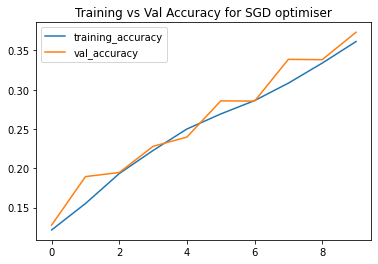

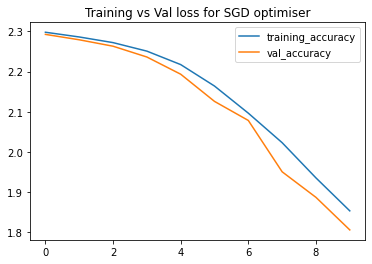

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_0_sgd.history['accuracy']
training_loss = history_0_sgd.history['loss']
val_accuracy = history_0_sgd.history['val_accuracy']
val_loss = history_0_sgd.history['val_loss']
epochs = range(len(training_accuracy))

plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for SGD optimiser")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for SGD optimiser")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  

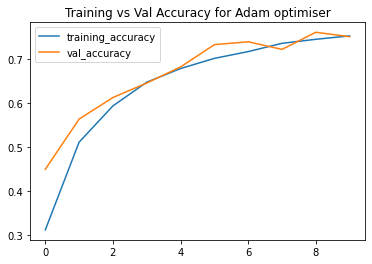

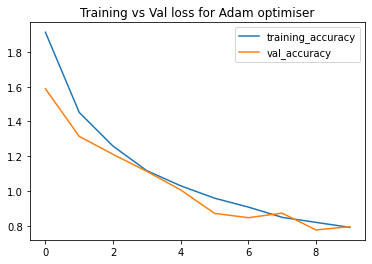

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_0_adam.history['accuracy']
training_loss = history_0_adam.history['loss']
val_accuracy = history_0_adam.history['val_accuracy']
val_loss = history_0_adam.history['val_loss']
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for Adam optimiser")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for Adam optimiser")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  


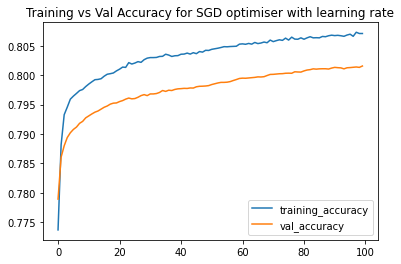

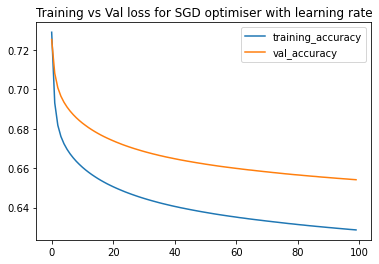

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_1_sgd.history['accuracy']
training_loss = history_1_sgd.history['loss']
val_accuracy = history_1_sgd.history['val_accuracy']
val_loss = history_1_sgd.history['val_loss']
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for SGD optimiser with learning rate")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for SGD optimiser with learning rate")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  

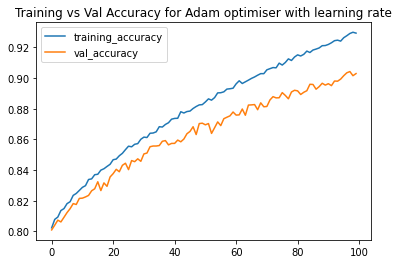

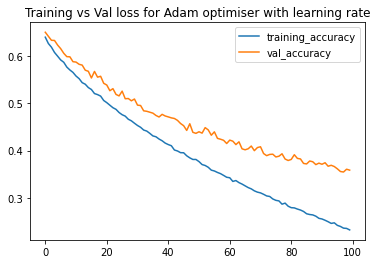

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_1_adam.history['accuracy']
training_loss = history_1_adam.history['loss']
val_accuracy = history_1_adam.history['val_accuracy']
val_loss = history_1_adam.history['val_loss']
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for Adam optimiser with learning rate")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for Adam optimiser with learning rate")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  

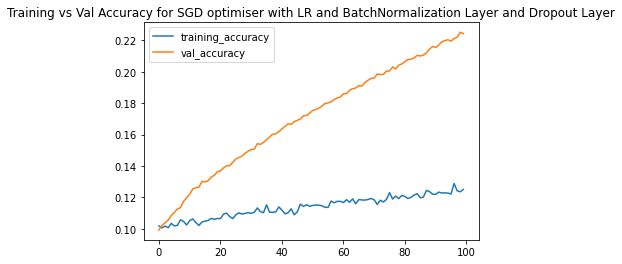

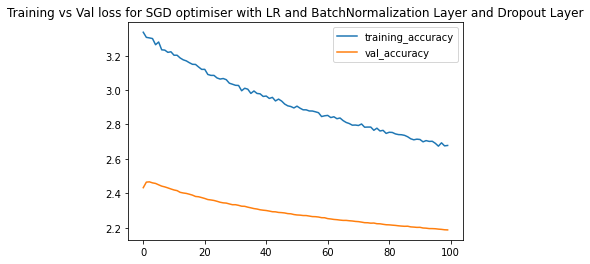

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_2_sgd.history['accuracy']
training_loss = history_2_sgd.history['loss']
val_accuracy = history_2_sgd.history['val_accuracy']
val_loss = history_2_sgd.history['val_loss']
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for SGD optimiser with LR and BatchNormalization Layer and Dropout Layer")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for SGD optimiser with LR and BatchNormalization Layer and Dropout Layer")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  

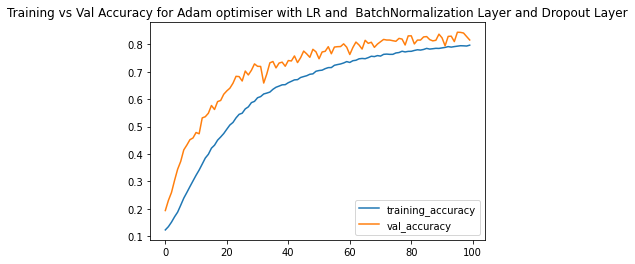

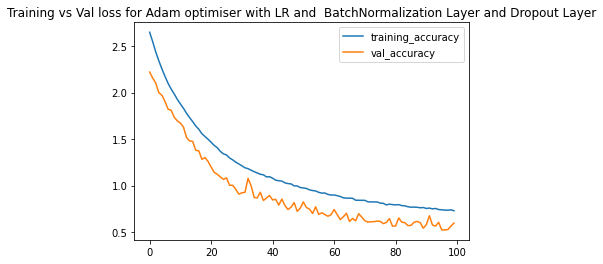

<Figure size 432x288 with 0 Axes>

In [ ]:
training_accuracy = history_2_adam.history['accuracy']
training_loss = history_2_adam.history['loss']
val_accuracy = history_2_adam.history['val_accuracy']
val_loss = history_2_adam.history['val_loss']
epochs = range(len(training_accuracy))
plt.plot(epochs,training_accuracy, label="training_accuracy")
plt.plot(epochs,val_accuracy, label="val_accuracy")
plt.title("Training vs Val Accuracy for Adam optimiser with LR and  BatchNormalization Layer and Dropout Layer")
plt.legend()
plt.figure()


plt.plot(epochs,training_loss, label="training_accuracy")
plt.plot(epochs,val_loss, label="val_accuracy")
plt.title("Training vs Val loss for Adam optimiser with LR and  BatchNormalization Layer and Dropout Layer")
plt.legend()
plt.figure()
plt.tight_layout(pad=2.0)  

Obsevations:

From the graphs and calculation, it has been observed that:
1. Graph Training vs Val acuracy with option as Adam optimiser with learning rate has maximum accuracy = 0.93
and Test accuracy: 0.8320000171661377 
The model tends to overfit in training department and testing accuracy is very less as compared to training.

2. Second to that is Training vs Val accuracy for Adam optimiser with LR and  BatchNormalization Layer and Dropout Layer , accuracy = 0.7963
with Test accuracy: 0.7913888692855835

As "Adam optimiser with LR and BatchNormalization Layer and Dropout Layer"
gives both test and training accuracy as somehwat similar (= 0.79), this model is more practical.


Predict some of the images ith labels

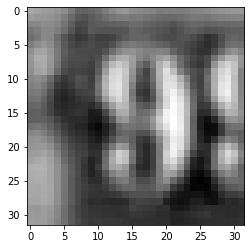

In [ ]:
plt.imshow(X_test_std[5].reshape(32,32),cmap='gray')

In [ ]:
#Predicting the digits
model.predict_classes(X_test_std)[5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9

In [ ]:
#Predicting the digits
model_2.predict_classes(X_test_std)[5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9

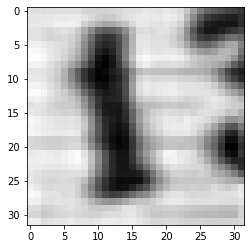

In [ ]:
plt.imshow(X_test_std[6].reshape(32,32),cmap='gray')

In [ ]:
model.predict_classes(X_test_std)[6]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1

In [ ]:
model_2.predict_classes(X_test_std)[6]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3